In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [6]:
# считываем данные из csv файла с помощью pandas
df = pd.read_csv("Video_Games.csv", sep=",")

# выводим информацию о таблице
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
# Приведем названия столбцов к нижнему регистру

print(df.columns)
columns = []
for c in df.columns:
    columns.append(c.lower())
df.columns = columns
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')


In [9]:
# Отобразим результат изменений
# Выведем только первые несколько строчек

df.head(2)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Поменяем у стлобца год тип на целочисленный

df['year_of_release'] = df['year_of_release'].astype('Int64')
df['year_of_release'].dtype

Int64Dtype()

In [18]:
# Создадим столбец sales - сумма продаж во всех регионах 

df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(12)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,29.80
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,28.32
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,28.31


In [21]:
# Сколько игр выпускалось в разные годы.

time_release = df.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['year', 'quantity']
time_release

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


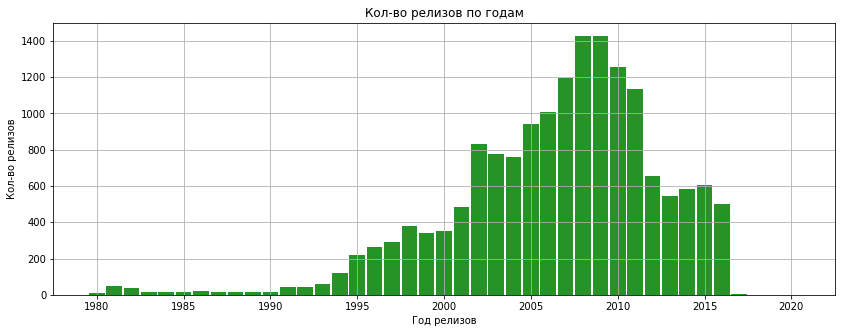

In [22]:
# Кол-во релизов по годам

plt.figure(figsize=(14, 5))
plt.bar(time_release['year'], time_release['quantity'], label='Кол-во релизов за год', color='g', alpha=0.85, width=0.9)
plt.xlabel('Год релизов')
plt.ylabel('Кол-во релизов')
plt.grid()
plt.title(f'Кол-во релизов по годам')
plt.show()

In [23]:
# Анализ продаж по платформам

plf = df.groupby('platform')['sales'].sum().sort_values().reset_index()
plf

,platform,sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


In [24]:
popul_platforms = plf.loc[17:30, 'platform'].values
popul_platforms

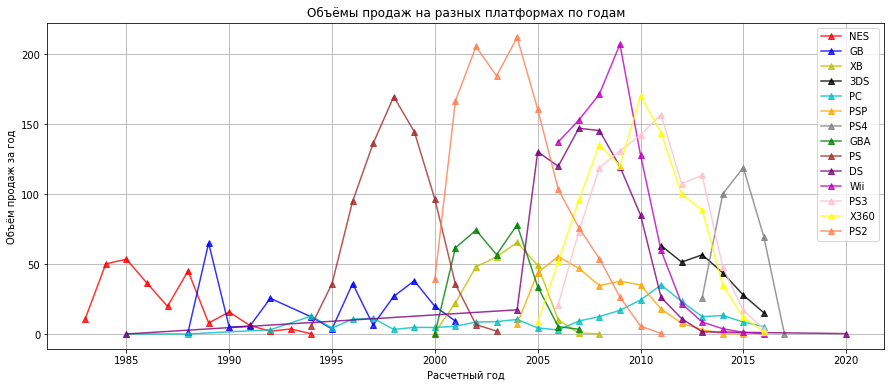

In [25]:
color = ['r','b','y','black','c','orange','grey','green','brown','purple','m','pink','yellow','coral','darkcyan','dimgray','lime']

plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

mean_year_life = 0
for i in range(0,len(popul_platforms)):
    platform  = df.query('platform == @popul_platforms[@i]').groupby('year_of_release')['sales'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', color=color[i],
                  label=popul_platforms[i], alpha=0.8, grid=True)
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show()

In [26]:
# Cредняя жизнь платформы
mean_year_life/len(popul_platforms)

11.357142857142858

In [27]:
platform2017 = df.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').\
    query('year_of_release>2004').fillna(0).reset_index()
platform2017['year_of_release'] = platform2017['year_of_release'].astype('Int64')

for column in platform2017.columns:
    if platform2017[column].sum()==0:
        platform2017.drop(column, axis=1,inplace=True)

display(platform2017)

platform,year_of_release,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,2005,0.00,0.00,130.14,33.86,27.62,4.37,160.66,0.00,0.00,43.84,0.00,0.00,0.00,8.25,49.08,0.00
1,2006,0.00,0.00,119.81,5.28,11.26,2.85,103.42,20.96,0.00,55.32,0.00,137.15,0.00,51.62,10.04,0.00
2,2007,0.00,0.02,146.94,3.40,0.27,9.28,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
3,2008,0.00,0.04,145.31,0.00,0.00,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
4,2009,0.00,0.00,119.54,0.00,0.00,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
5,2010,0.00,0.00,85.02,0.00,0.00,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
6,2011,63.20,0.00,26.18,0.00,0.00,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
7,2012,51.36,0.00,11.01,0.00,0.00,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
8,2013,56.57,0.00,1.54,0.00,0.00,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96
9,2014,43.76,0.00,0.00,0.00,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,0.00,54.07


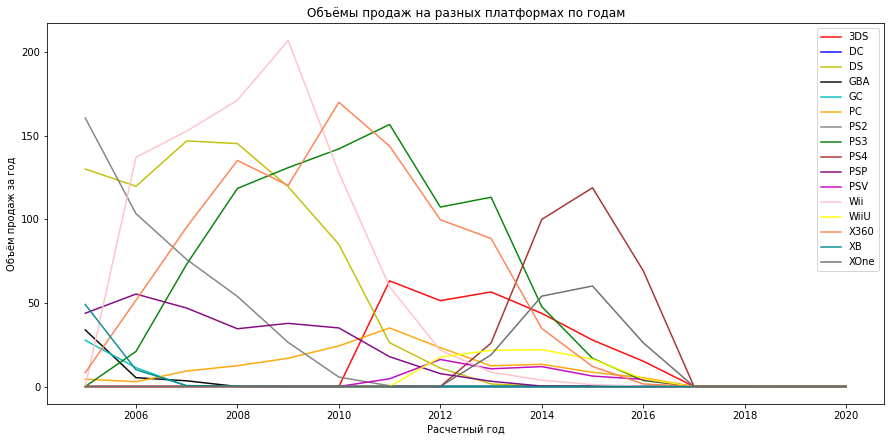

In [29]:
#Построение графика 
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in platform2017.columns[1:]:
    plt.plot(platform2017['year_of_release'].to_list(), platform2017[column].to_list(), label=column, color=color[i], alpha=0.95);
    i+=1 

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show()

In [30]:
op5_2017 = ['PS4', 'XOne', 'WiiU', 'PSV', '3DS']

top2005 = df.query('year_of_release>=2005').groupby('platform')['sales'].sum().sort_values(ascending=False).reset_index().head(10)
top2005

,platform,sales
0,X360,961.24
1,PS3,931.34
2,Wii,891.18
3,DS,785.78
4,PS2,426.46
5,PS4,314.18
6,PSP,282.47
7,3DS,257.81
8,PC,167.79
9,XOne,159.32


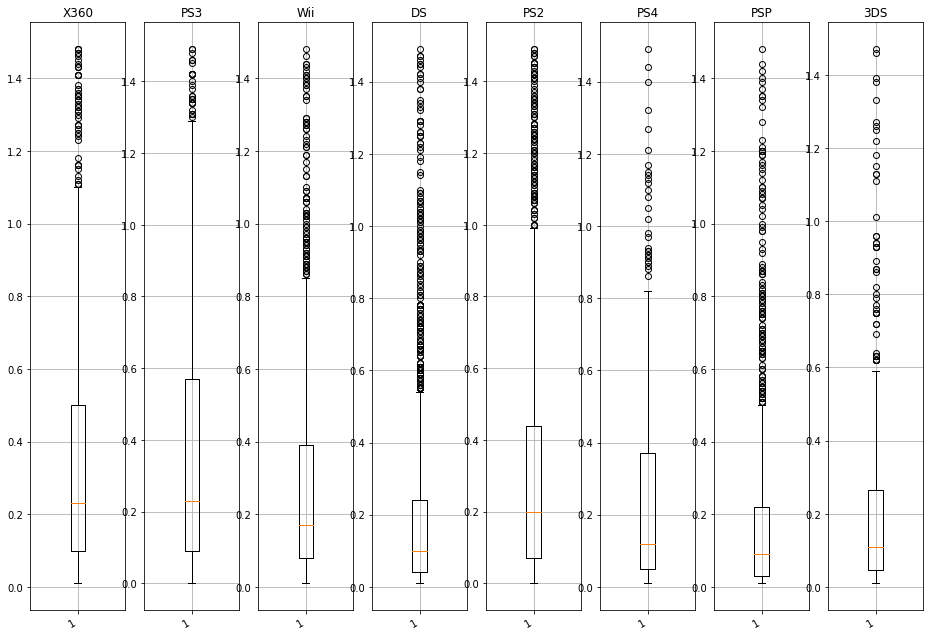

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=1, ncols=8, figsize=(16, 12))
fig.autofmt_xdate()

p = {ax1:'X360', ax2:'PS3', ax3:'Wii', ax4:'DS', ax5:'PS2', ax6:'PS4', ax7:'PSP', ax8:'3DS'}
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    sales = df.query('platform==@p[@ax] and sales<1.5')['sales']
    ax.boxplot(sales)
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()

In [36]:
one_pl = df.query('platform=="X360"')[['sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
one_pl



,sales,critic_score,user_score
0,21.82,61.0,6.3
1,16.27,97.0,8.1
2,14.73,88.0,3.4
3,14.62,87.0,6.3
4,13.68,83.0,4.8
...,...,...,...
906,0.02,64.0,7.6
907,0.02,62.0,7.3
908,0.02,75.0,6.9
909,0.01,77.0,8.2


Коэффициент Зависимости Продаж от отзывов критиков = 0.39331654587924225


Text(0.5, 1.0, 'Зависимость Продаж от отзывов критиков')

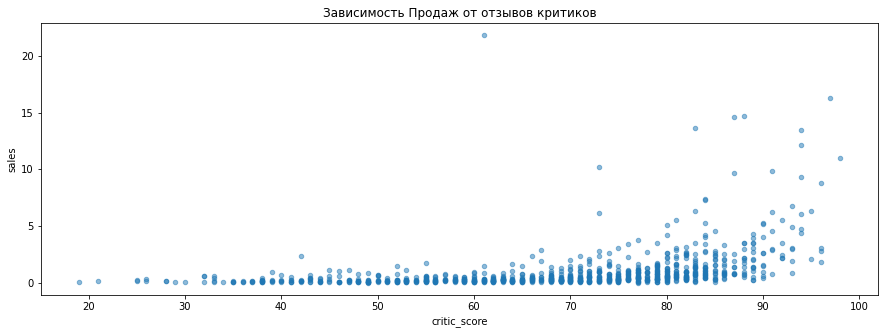

In [38]:
print('Коэффициент Зависимости Продаж от отзывов критиков =' , one_pl['sales'].corr(one_pl['critic_score']))
one_pl.plot(x='critic_score',y='sales',kind='scatter',figsize=(15,5), alpha=0.5)
plt.title('Зависимость Продаж от отзывов критиков')

In [40]:
#Распределение таблиц по жанрам
genres = df.groupby('genre')['name'].count().sort_values(ascending=False)
genres

In [41]:
genre_sales = df.groupby('genre')['sales'].sum().sort_values(ascending=False)
genre_sales

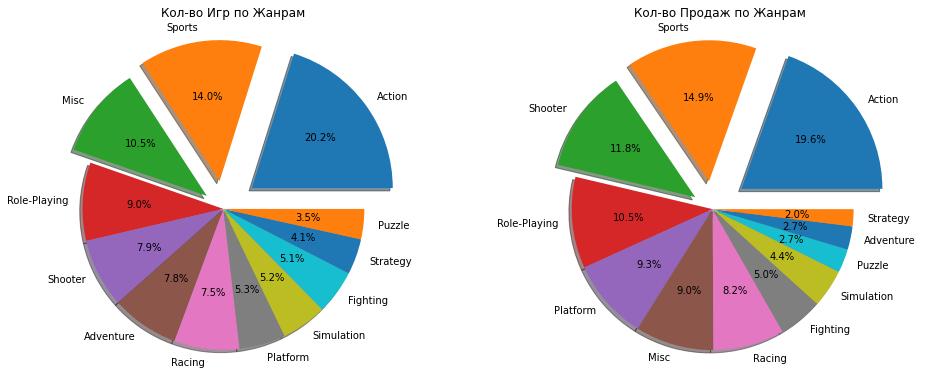

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.autofmt_xdate()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels1 = genres.index
sizes1 = genres.values

labels2 = genre_sales.index
sizes2 = genre_sales.values
explode = (0.25, 0.2, 0.15, 0,0,0,0,0,0,0,0,0)
ax1.set_title('Кол-во Игр по Жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0)  
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.set_title('Кол-во Продаж по Жанрам')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0) 
ax2.axis('equal')

plt.show()

In [44]:
popul_5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_5genre_dict[region] = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
popul_5genre_dict

{'na_sales': genre
 Action      879.01
 Sports      684.43
 Shooter     592.24
 Platform    445.50
 Misc        407.27
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action     519.13
 Sports     376.79
 Shooter    317.34
 Racing     236.51
 Misc       212.74
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    355.46
 Action          161.44
 Sports          135.54
 Platform        130.83
 Misc            108.11
 Name: jp_sales, dtype: float64}

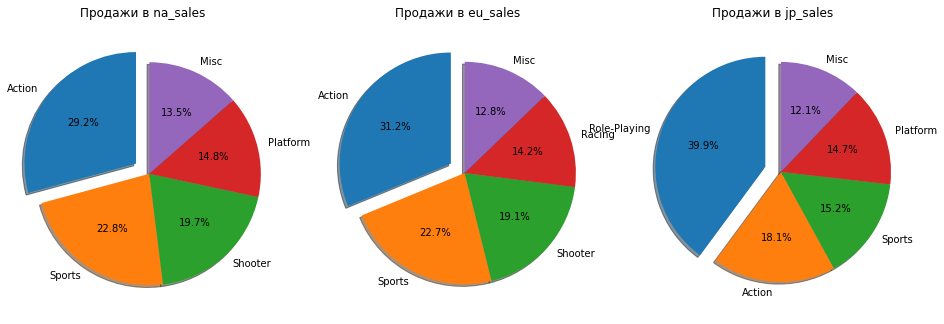

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate()

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_5genre_dict[region[i]].index
    sizes = popul_5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()